In [1]:
#Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset_train = pd.read_csv("/kaggle/input/google-stock-prices-training-and-test-data/Google_Stock_Price_Train.csv")
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
training_set = dataset_train.iloc[:,1:2].values
print(training_set)
print(training_set.shape)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]
(1258, 1)


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)

scaled_training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [5]:
X_train = []
y_train = []
for i in range(60,1258):
    X_train.append(scaled_training_set[i-60:i, 0]) 
    y_train.append(scaled_training_set[i, 0])
X_train = np.array(X_train)
y_train = np.array(y_train)
print (X_train.shape) 
print(y_train.shape)

(1198, 60)
(1198,)


In [6]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1198, 60, 1)

In [7]:
from keras.models import Sequential 
from keras.layers import LSTM 
from keras.layers import Dense
from keras.layers import Dropout

In [8]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout (0.2))
regressor.add(LSTM(units= 50, return_sequences=True))
regressor.add(Dropout (0.2))
regressor.add(LSTM(units=50, return_sequences= True))
regressor.add(Dropout (0.2))
regressor.add(LSTM(units= 50)) 
regressor.add(Dropout (0.2))
regressor.add(Dense (units=1))

In [9]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 12s 102ms/step - loss: 0.0392
Epoch 2/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0059
Epoch 3/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0053
Epoch 4/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0054
Epoch 5/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0055
Epoch 6/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0049
Epoch 7/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0049
Epoch 9/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0046
Epoch 10/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0043
Epoch 11/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0040
Epoch 12/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0044
Epoch 13/100

In [10]:
dataset_test = pd.read_csv("/kaggle/input/google-stock-prices-training-and-test-data/Google_Stock_Price_Test.csv")
actual_stock_price = dataset_test.iloc[:,1:2].values

In [11]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total)- len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(60,80):
    X_test.append(inputs [i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [12]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


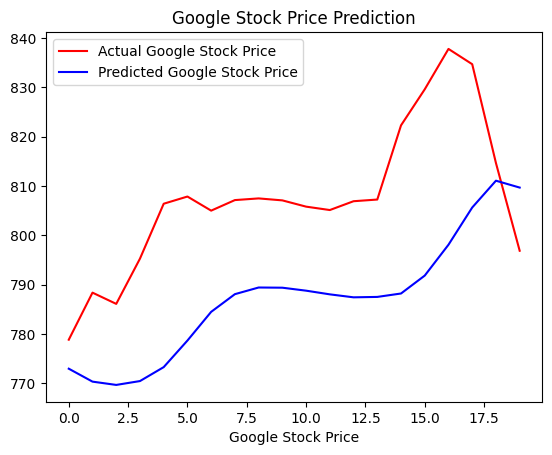

In [13]:
plt.plot(actual_stock_price, color = 'red', label = 'Actual Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price') 
plt.title("Google Stock Price Prediction")
plt.xlabel('Time')
plt.xlabel('Google Stock Price')
plt.legend()